<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo113/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 4 - Actividad 1
## Jesica Paola Pulido Vásquez - A01793650
## Joan Sebastian Jimenez Chacon - A01793970

**Ciencia de Datos**

Jobish Vallokavungai

*11 de octubre de 2022*

Para este actividad usa el base de datos encontrados por [aquí](https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv)  y su desripción [aquí](https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/dataset_info.txt)

**Carga de Librerias**

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

**Lectura de los datos**

In [2]:
data = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [3]:
data_df = pd.read_csv(data)
df = data_df.copy()
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

**Eliminación de variables categoricas**

In [6]:
df_num = df.drop(['ID','X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'],axis=1)
df_num

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


**Renombramiento de las variables**

In [7]:
df_nom = df_num.rename(columns = {'X1' : 'A of the given credit (NT dollar)', 'X5': 'Age', 'X12': 'A of bill statement in September', 'X13': 'A of bill statement in August', 
                         'X14': 'A  bill statement in July', 'X15': 'A  bill statement in June', 'X16': 'A  bill statement in May', 'X17': 'A  bill statement in April', 
                         'X18': 'A paid in September', 'X19': 'A paid in August', 'X20': 'A paid in July', 'X21': 'A paid in June', 'X22': 'A paid in May', 
                         'X23': 'A paid in April'})
df_nom

,A of the given credit (NT dollar),Age,A of bill statement in September,A of bill statement in August,A bill statement in July,A bill statement in June,A bill statement in May,A bill statement in April,A paid in September,A paid in August,A paid in July,A paid in June,A paid in May,A paid in April
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000,41.0,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


**Eliminación de registros nulos**

In [8]:
df_nom.dropna(inplace=True)
print("¿Hay valores nulos?",df.isna().values.any())

¿Hay valores nulos? True


**Normalización y generación de PCA**

In [30]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_nom), columns=df_nom.columns)
df_scale

,A of the given credit (NT dollar),Age,A of bill statement in September,A of bill statement in August,A bill statement in July,A bill statement in June,A bill statement in May,A bill statement in April,A paid in September,A paid in August,A paid in July,A paid in June,A paid in May,A paid in April
0,-1.137171,-1.246018,-0.642621,-0.647502,-0.668106,-0.672592,-0.663184,-0.652856,-0.341883,-0.227134,-0.296787,-0.308091,-0.314115,-0.293458
1,-0.366343,-1.028971,-0.659333,-0.666842,-0.639377,-0.621748,-0.606374,-0.598118,-0.341883,-0.213642,-0.240012,-0.244285,-0.314115,-0.181003
2,-0.597591,-0.160781,-0.298805,-0.494058,-0.482587,-0.449902,-0.417397,-0.391856,-0.250245,-0.191951,-0.240012,-0.244285,-0.248680,-0.012322
3,-0.905922,0.164790,-0.057825,-0.013626,0.032485,-0.232620,-0.187017,-0.156891,-0.221148,-0.169435,-0.228657,-0.237905,-0.244165,-0.237230
4,-0.905922,2.335264,-0.578761,-0.611434,-0.161481,-0.347204,-0.348370,-0.331730,-0.221148,1.334291,0.270964,0.266157,-0.269030,-0.255279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29966,0.404485,0.381837,1.869341,2.017063,2.325514,0.694905,-0.149560,-0.384621,0.171241,0.610627,-0.012741,-0.113676,0.013063,-0.237230
29967,-0.135095,0.815932,-0.672895,-0.665396,-0.627557,-0.533067,-0.577846,-0.652856,-0.230988,-0.104058,0.214075,-0.299860,-0.314115,-0.293458
29968,-1.060088,0.164790,-0.647345,-0.643935,-0.638282,-0.348168,-0.324758,-0.327936,-0.341883,-0.257024,0.952264,-0.040109,-0.183244,-0.119153
29969,-0.674674,0.598885,-0.718074,0.409782,0.421874,0.147465,-0.468255,0.168700,4.843691,-0.109133,-0.229906,-0.185202,3.151615,-0.192024


In [21]:
pcs = PCA()
pcs.fit(preprocessing.scale(df_nom.iloc[:,:].dropna(axis=0))) 
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,2.4329,1.3099,1.0223,0.9619,0.9401,0.9342,0.8830,0.8524,0.8411,0.5142,0.2665,0.2026,0.1592,0.1525
Proportion of variance,0.4228,0.1226,0.0746,0.0661,0.0631,0.0623,0.0557,0.0519,0.0505,0.0189,0.0051,0.0029,0.0018,0.0017
Cumulative proportion,0.4228,0.5453,0.6200,0.6861,0.7492,0.8115,0.8672,0.9191,0.9696,0.9885,0.9936,0.9965,0.9983,1.0000


**Scatter Plot**

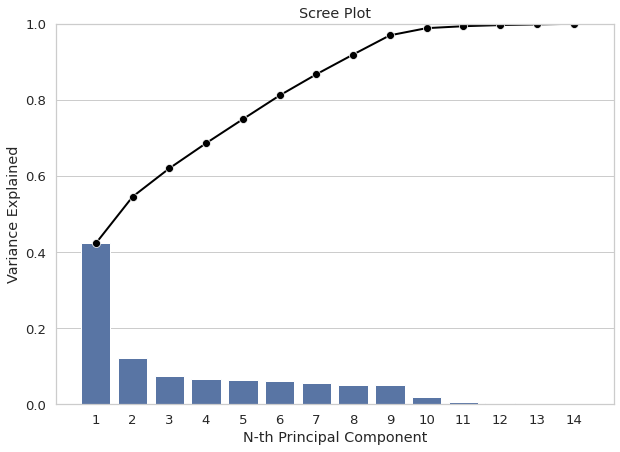

In [12]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


**Correlación de las variables**

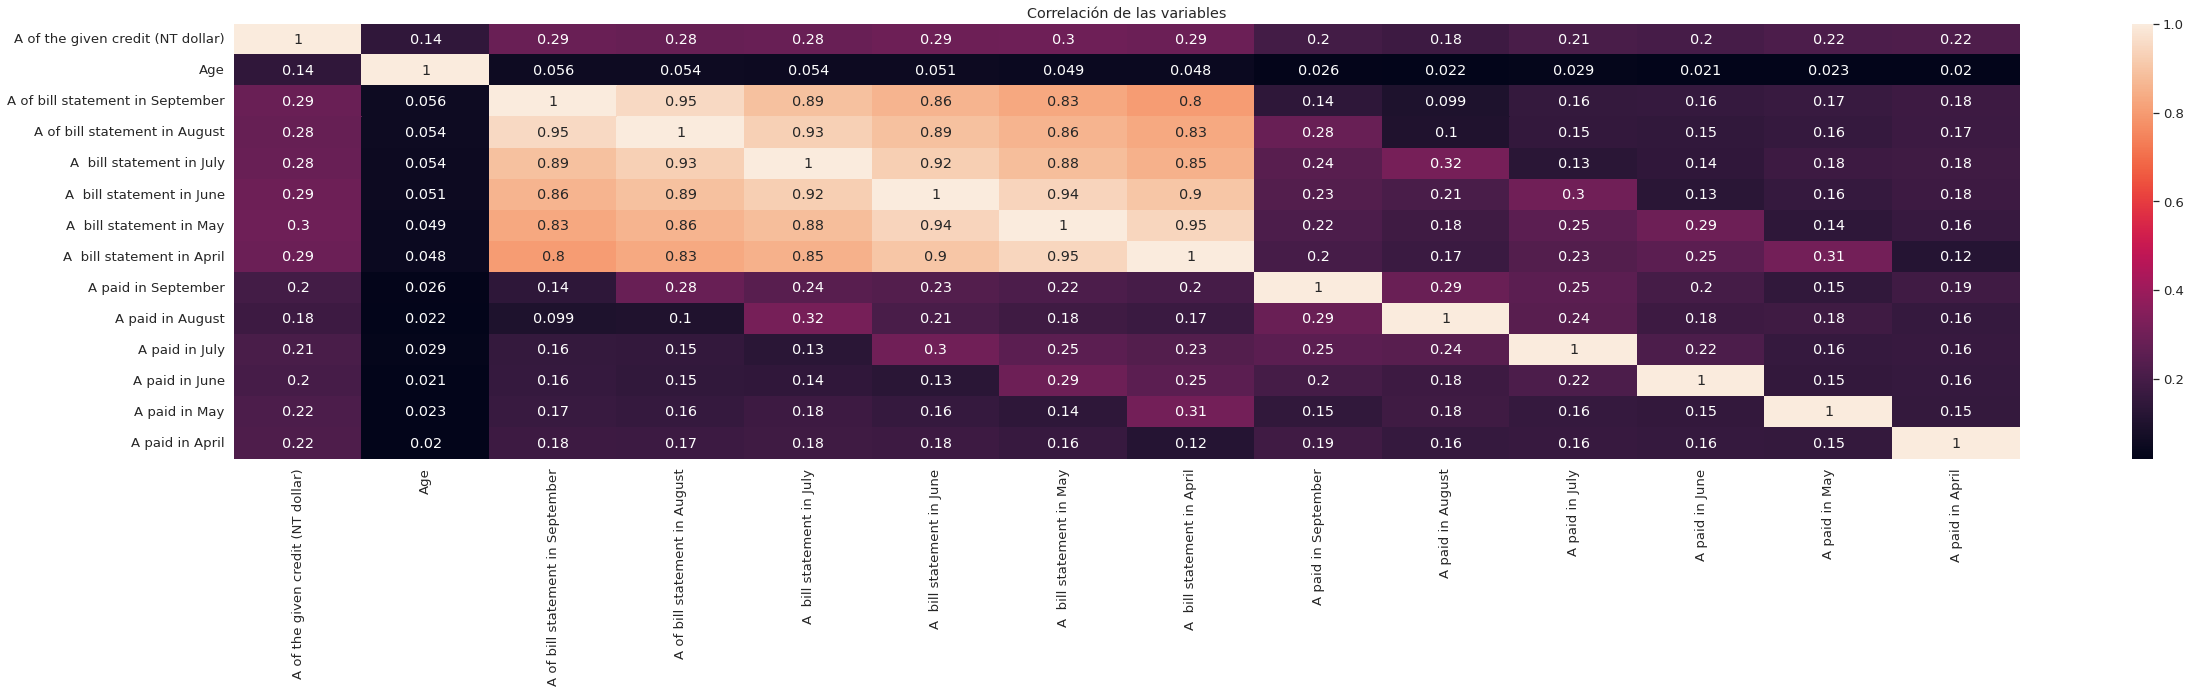

In [13]:
corr = df_nom.corr()
plt.figure(figsize=(40,8))
sns.heatmap(corr,annot=True)
plt.title("Correlación de las variables")
plt.show()

**¿Cuál es el número de componentes mínimo y por qué?**

De acuerdo a la varianza acumulada, se escogen las 7 primeras componentes pricipales que se acercan al 90% de los datos. 

In [14]:
pcsSummary_df.iloc[:,7]

Standard deviation        0.852435
Proportion of variance    0.051902
Cumulative proportion     0.919112
Name: PC8, dtype: float64

**¿Cuál es la variación de los datos que representan esos componentes?**

Para las 8 componentes seleccionadas la variación es del 85%. 

**¿Cuál es la pérdida de información después de realizar PCA?**

Se perderá un 9% de información 

In [15]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=df_nom.columns)
pcsComponents_df.iloc[:,:7]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
A of the given credit (NT dollar),0.165467,0.300798,-0.378586,-0.200022,0.035284,-0.078832,0.111146
Age,0.032784,0.072029,-0.869404,0.339083,-0.039855,0.071416,-0.078753
A of bill statement in September,0.372452,-0.190762,-0.034274,-0.063879,0.041402,-0.043998,0.008159
A of bill statement in August,0.383257,-0.174623,-0.001873,0.007655,0.083170,-0.028834,-0.032455
A bill statement in July,0.388267,-0.126883,0.034734,0.060535,0.113784,0.099222,-0.121170
A bill statement in June,0.391561,-0.120407,0.034078,0.074763,0.028364,0.014530,0.126488
A bill statement in May,0.388508,-0.105928,0.033881,0.039521,-0.106745,-0.099292,-0.007572
A bill statement in April,0.380675,-0.094168,0.018478,-0.070638,-0.164967,0.069259,0.007893
A paid in September,0.135111,0.383181,0.173883,0.362104,0.225630,0.040580,-0.201663
A paid in August,0.116760,0.408370,0.201028,0.345707,0.148667,0.408358,-0.278849


In [16]:
pcsComponents_df.iloc[:,:7].abs().idxmax()

PC1    A  bill statement in June
PC2             A paid in August
PC3                          Age
PC4                A paid in May
PC5              A paid in April
PC6                A paid in May
PC7               A paid in July
dtype: object

In [17]:
pcsComponents_df.iloc[:,:7].abs().idxmin()

PC1                              Age
PC2                              Age
PC3    A of bill statement in August
PC4    A of bill statement in August
PC5        A  bill statement in June
PC6        A  bill statement in June
PC7         A  bill statement in May
dtype: object

**De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

La variable con mayor importancia es:

PC1: A  bill statement in June

PC2: A paid in August

PC3: Age

PC4: A paid in May

PC5: A paid in April

PC6: A paid in May

PC7: A paid in July

La variable con menor importancia es:
PC1: Age

PC2: Age

PC3: A bill statement in August

PC4: A bill statement in August

PC5: A bill statement in June

PC6: A bill statement in June

PC7: A bill statement in May


**¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

- Cuando existen demasiada variables númericas
- Cuando hay muchas variables correlacionadas

**BloxPlot**

[]

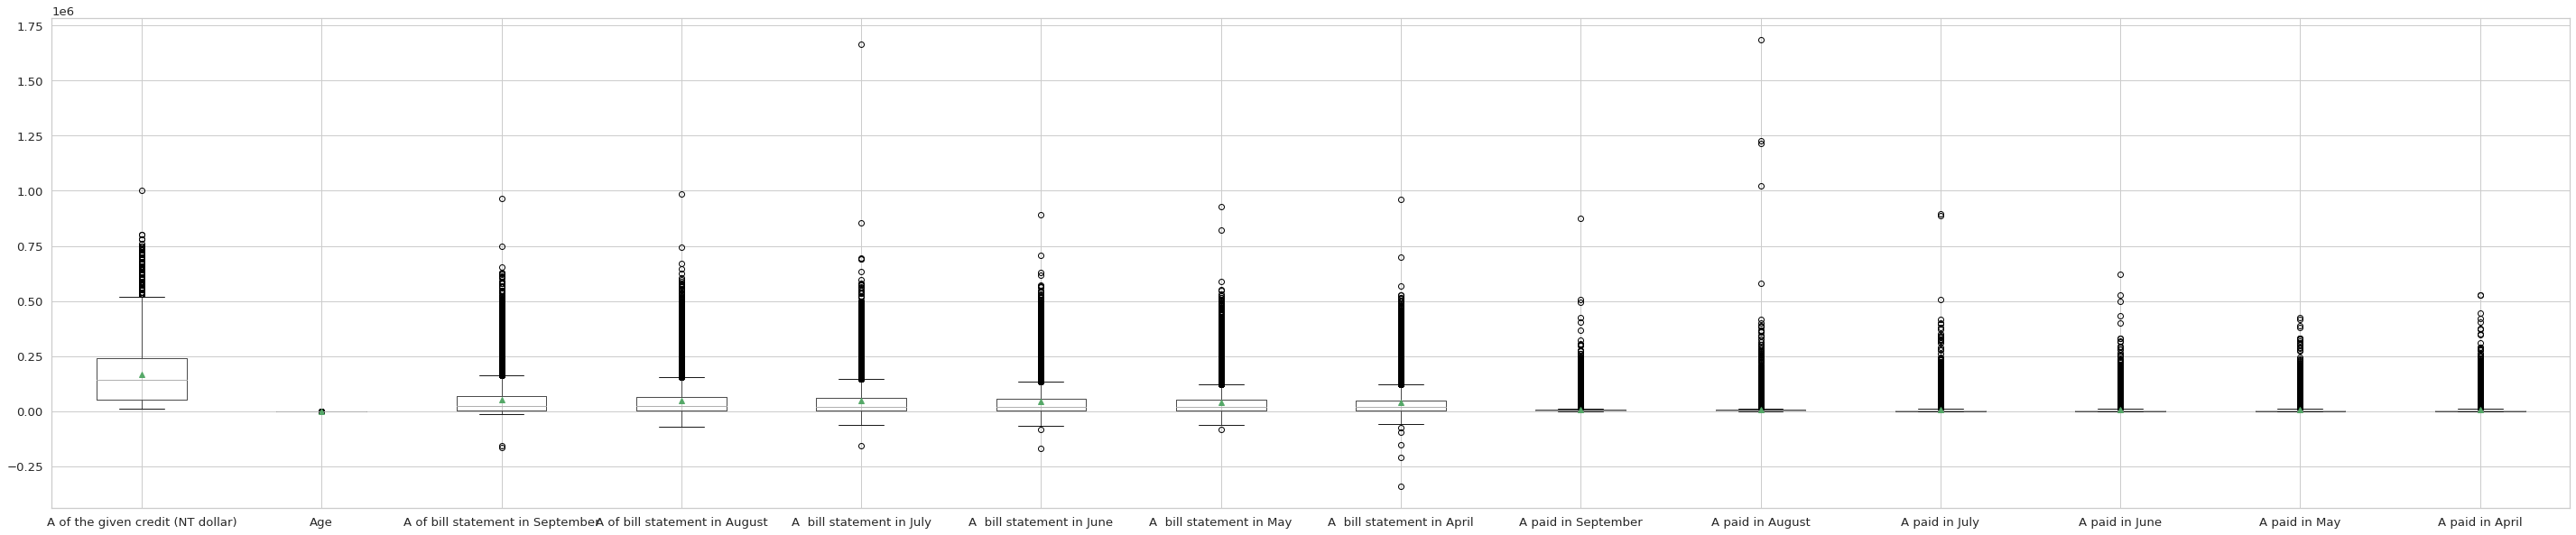

In [33]:
df_cols = df_nom.columns.to_list()
boxplot = df_nom.boxplot(figsize=(50, 10), column=df_cols, labels=df_cols, showmeans=True)
boxplot.plot()